<a href="https://colab.research.google.com/github/001ckk/week-2-IP-core-/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2022_05_Christopher_Kimani_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BANK ACCESIBILITY IN EAST AFRICA.**

**Data Analytic's Question**

Predicting which individuals are most likely to have bank accounts.

**Metrics for success.**

1. Perform univariate, bivariate and multivariate analysis recording your observations.
2. Performing the Linear Discriminant Analysis.
3. Challenge the solution and providing insights on improvement of the analysis.

**Context**

Financial inclusion remains one of the major hinderances to economic and human development in Africa.
Very few adults have access to or use a commercial bank account.
Access to a bank account is considered an indicator to financial inclusion. Despite the penetration of mobile money in African countries, banks still play a vital role in facilitating access to financial services.
Access to a bank account enables households to facilitate payments while also helping creade a credit worthiness and increased access to other financial services.
Access to a bank account is essential long-term to economic growth.

Our aim is to target find out which persons are most likely to have or use a bank account and thus assist provide insight on and how to improve this financial inclusion.

**Experimental Design.**

1. Define research question

2. Data Exploration

3. Univariate analysis

4. Bivariate Analysis

5. Multivariate Analysis

6. Summary of Findings

7. Challenging the solution

**Data Relevance**

The following data sets were provided. The data shows the financial services mostly used in East Africa. It was extracted from Finscope surveys between 2016 to 2018.

FinAccess Kenya 2018: https://fsdkenya.org/publication/finaccess2019/

Finscope Rwanda 2016: http://www.statistics.gov.rw/publication/finscope-rwanda-2016

Finscope Tanzania 2017: http://www.fsdt.or.tz/finscope/

Finscope Uganda 2018: http://fsduganda.or.ug/finscope-2018-survey-report/

And for the data, here it is and its variable deinitions:

Variable Definitions: http://bit.ly/VariableDefinitions

Dataset: http://bit.ly/FinancialDataset


**Importing Libraries.**

In [97]:
#importing Python libraries or use in analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import pandas_profiling as pp
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import warnings
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


**Data Loading and Confirmation**

In [98]:
# Loading the Data from the source.
# Financial Dataset url: http://bit.ly/FinancialDataset

finance_ds = pd.read_csv('http://bit.ly/FinancialDataset')
finance_ds.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [99]:
#checking further information.
finance_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [100]:
#checking summary information.
finance_ds.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [101]:
# Loading the variable definition data
# Variable Definitions url: http://bit.ly/VariableDefinitions

definitions = pd.read_csv('http://bit.ly/VariableDefinitions')
definitions

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


**Data Cleaning**

In [102]:
#check for data duplicates in the dataset
finance_ds.duplicated().sum()

0

In [103]:
# Checking for outliers

Q1 = finance_ds.quantile(0.25)
Q3 = finance_ds.quantile(0.75)

print(Q1)
print(Q3)

IQR = Q3 - Q1
print(IQR)

lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)

print('Lower_Bound' +str(lower_bound))
print('Upper_Bound' +str(upper_bound))

year              2016.0
household_size       2.0
Respondent Age      26.0
Name: 0.25, dtype: float64
year              2018.0
household_size       5.0
Respondent Age      49.0
Name: 0.75, dtype: float64
year               2.0
household_size     3.0
Respondent Age    23.0
dtype: float64
Lower_Boundyear              2013.0
household_size      -2.5
Respondent Age      -8.5
dtype: float64
Upper_Boundyear              2021.0
household_size       9.5
Respondent Age      83.5
dtype: float64


In [104]:
# Removing outliers

finance_ds1 = finance_ds[~((finance_ds < (Q1 - 1.5 * IQR)) |(finance_ds > (Q3 + 1.5 * IQR))).any(axis=1)]

finance_ds1.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  This is separate from the ipykernel package so we can avoid doing imports until


(22903, 13)

I have removed ouliers and remained with 22903 rows.

In [105]:
# checking for missing values in the newest dataset
finance_ds1.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            27
Respondent Age            33
gender_of_respondent      33
The relathip with head     4
marital_status            31
Level of Educuation       29
Type of Job               30
dtype: int64

In [106]:
# Dealing with missing values
# Repalce missing values with mean for continous variables and mode for categorical variables.

finance_ds1['country'].fillna(finance_ds1['country'].mode()[0], inplace=True)
finance_ds1['Has a Bank account'].fillna(finance_ds1['Has a Bank account'].mode()[0], inplace=True)
finance_ds1['Type of Location'].fillna(finance_ds1['Type of Location'].mode()[0], inplace=True)
finance_ds1['Cell Phone Access'].fillna(finance_ds1['Cell Phone Access'].mode()[0], inplace=True)
finance_ds1['household_size'].fillna(finance_ds1['household_size'].mean(), inplace=True)
finance_ds1['Respondent Age'].fillna(finance_ds1['Respondent Age'].mean(), inplace=True)
finance_ds1['gender_of_respondent'].fillna(finance_ds1['gender_of_respondent'].mode()[0], inplace=True)
finance_ds1['The relathip with head'].fillna(finance_ds1['The relathip with head'].mode()[0], inplace=True)
finance_ds1['marital_status'].fillna(finance_ds1['marital_status'].mode()[0], inplace=True)
finance_ds1['Level of Educuation'].fillna(finance_ds1['Level of Educuation'].mode()[0], inplace=True)
finance_ds1['Type of Job'].fillna(finance_ds1['Type of Job'].mode()[0], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [107]:
finance_ds1.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

Removed all outliers, duplicates and anomalies.

**Data Exploration**

**Univariate Analysis**

In [108]:
# Frequencies of gender of respondents.
print("1. Frequencies of gender of respondents.")
print(finance_ds1['gender_of_respondent'].value_counts())
print("")
print("")

# Frequencies of cell phone access
print("2. Frequencies of cell phone access")
print(finance_ds1['Cell Phone Access'].value_counts())
print("")
print("")


# Frequencies of 'has a bank account
print("3. Frequencies of 'has a bank account")
print(finance_ds1['Has a Bank account'].value_counts())
print("")
print("")

# Frequencies of 'level of education
print("4. Frequencies of 'level of education")
finance_ds1['Level of Educuation'].value_counts()

1. Frequencies of gender of respondents.
Female    13521
Male       9382
Name: gender_of_respondent, dtype: int64


2. Frequencies of cell phone access
Yes    17110
No      5793
Name: Cell Phone Access, dtype: int64


3. Frequencies of 'has a bank account
No     19656
Yes     3247
Name: Has a Bank account, dtype: int64


4. Frequencies of 'level of education


Primary education                  12556
No formal education                 4270
Secondary education                 4113
Tertiary education                  1146
Vocational/Specialised training      787
6                                     25
Other/Dont know/RTA                    6
Name: Level of Educuation, dtype: int64

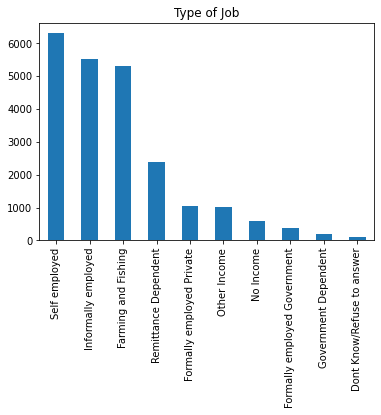

In [109]:
# bar graph for 'type of job'

finance_ds1['Type of Job'].value_counts().plot.bar(title='Type of Job')


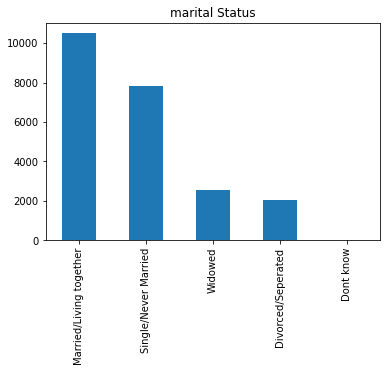

In [110]:
# plotting bar chart for 'marital status'

finance_ds1['marital_status'].value_counts().plot.bar(title='marital Status')

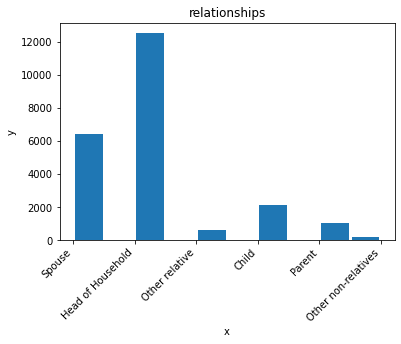

In [111]:
# Plotting a histogram for 'relationship with head'

rel=finance_ds1['The relathip with head']

plt.hist(rel, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('x')
plt.xticks(rotation=45, ha="right")
plt.ylabel('y')
plt.title('relationships')
plt.show()

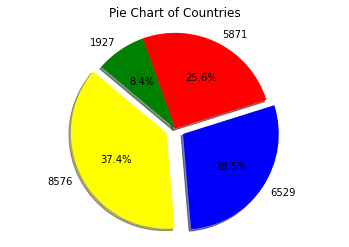

In [112]:
# Plotting a pie chart for the country

# Defining our labels, sizes, colors and explode 
countries = finance_ds1['country'].value_counts()
colors = ['yellow', 'blue', 'red', 'green']

# Highlights a particular Value in plot
explode = (0.1, 0.1, 0, 0)  

# Plotting our pie chart
plt.pie(countries, explode=explode, labels=countries, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Pie Chart of Countries')
plt.show()

Measures of Central Tendency

In [113]:
# Describe numerical variables
finance_ds1[['household_size','Respondent Age']].describe()

,household_size,Respondent Age
count,22903.000000,22903.000000
mean,3.573396,38.345081
std,2.078557,15.792632
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,48.000000
max,9.000000,83.000000


In [114]:
# The modes of household size and Respondent Age
print('1. Household_size mode')
print(finance_ds1['household_size'].mode())
print('')
print('')

print('2. Respondent Age mode')
print(finance_ds1['Respondent Age'].mode())

# These are the numbers appearing the most in the two columns respectively

1. Household_size mode
0    2.0
dtype: float64


2. Respondent Age mode
0    30.0
dtype: float64


In [115]:
# finding the medians

print('1. Respondent Age median')
print(finance_ds1['Respondent Age'].median())
print('')
print('')

print('2. Household_size median')
print(finance_ds1['household_size'].median())

#This is the value that divides the data into two equal parts.

1. Respondent Age median
35.0


2. Household_size median
3.0


Measures of Dispersion

In [116]:
# finding the standard deviations

print('1. Respondent Age standard deviation')
print(finance_ds1['Respondent Age'].std())
print('')
print('')

print('2. household_size standard deviation')
print(finance_ds1['household_size'].std())


# This is how far a value is from the mean

1. Respondent Age standard deviation
15.792632474845702


2. household_size standard deviation
2.078556853919515


In [117]:
# finding the variances

print('1. Respondent Age variance')
print(finance_ds1['Respondent Age'].var())
print('')
print('')

print('2. household_size variance')
print(finance_ds1['household_size'].var())

# This is the square of standard deviation.
# It gives the same information - The distance from the mean.

1. Respondent Age variance
249.40724048555106


2. household_size variance
4.320398594975792


In [118]:
# Range.

print('1. household_size range')
finance_ds1_max = finance_ds1['household_size'].max()
finance_ds1_min = finance_ds1['household_size'].min()
household_range = finance_ds1_max - finance_ds1_min
print(household_range)
print('')
print('')

print('2. Respondent Age range')
finance_ds1_max = finance_ds1['Respondent Age'].max()
finance_ds1_min = finance_ds1['Respondent Age'].min()
respondentage_range = finance_ds1_max - finance_ds1_min
print(respondentage_range)

# This shows the difference between the maximum and the minimum value.

1. household_size range
9.0


2. Respondent Age range
67.0


In [119]:
# Skweness

# determining skewness of household size
print('1. household_size skewness')
print(finance_ds1['household_size'].skew())
print('')
print('')

print('2. Respondent Age skewness')
print(finance_ds1['Respondent Age'].skew())

# Both are positive 
# Normal distribution is assumed.

1. household_size skewness
0.6110930989257479


2. Respondent Age skewness
0.7415098242614647


In [120]:
# Kurtosis

print('1. household_size kurtosis')
print(finance_ds1['household_size'].kurt())
print('')
print('')

print('2. Respondent Age kurtosis')
print(finance_ds1['Respondent Age'].kurt())

# Both are less than zero
# The distribution is light tailed resulting in fewer extreme positive or negative events.

1. household_size kurtosis
-0.49635260958004856


2. Respondent Age kurtosis
-0.2323574017276666


**Bivariate Analysis**

Categorical data

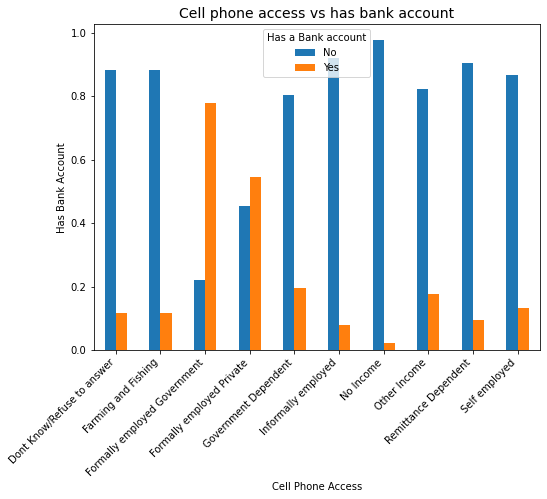

In [121]:
# Cell phone access Vs Has bank account.

country = finance_ds1.groupby('Type of Job')['Has a Bank account'].value_counts(normalize=True).unstack()
country.plot(kind='bar', figsize=(8, 6))
plt.xticks(rotation=45, ha="right")
plt.title('Cell phone access vs has bank account', fontsize=14)
plt.ylabel('Has Bank Account')
plt.xlabel('Cell Phone Access')
plt.show()

# For most categories people do not have bank accounts.
# Only people in formal employment have access to bank accounts.

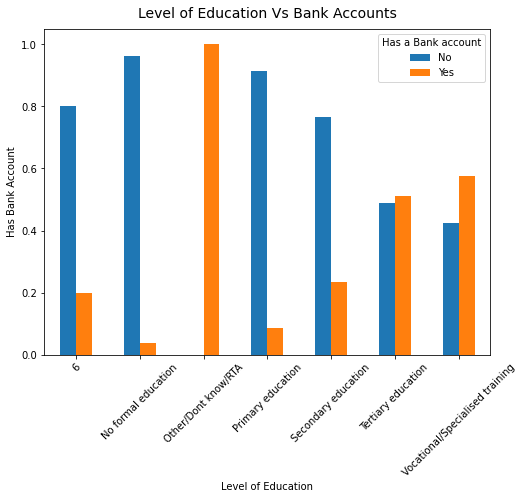

In [122]:
country = finance_ds1.groupby('Level of Educuation')['Has a Bank account'].value_counts(normalize=True).unstack()
country.plot(kind='bar', figsize=(8, 6))
plt.xticks(rotation = 45)
plt.title('Level of Education Vs Bank Accounts', fontsize=14, y=1.015)
plt.ylabel('Has Bank Account')
plt.xlabel('Level of Education')
plt.show()

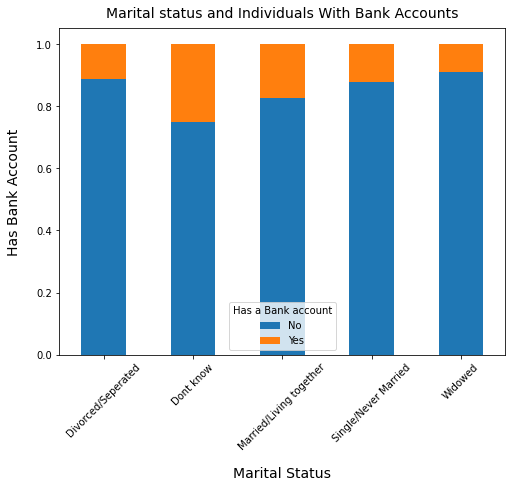

In [123]:
country = finance_ds1.groupby('marital_status')['Has a Bank account'].value_counts(normalize=True).unstack()
country.plot(kind='bar', figsize=(8, 6), stacked=True)
plt.xticks(rotation = 45)
plt.title('Marital status and Individuals With Bank Accounts', fontsize=14, y=1.015)
plt.ylabel('Has Bank Account', fontsize=14, labelpad=15)
plt.xlabel('Marital Status', fontsize=14, labelpad=15)
plt.show()

# For all categories, most people do not have bank accounts.

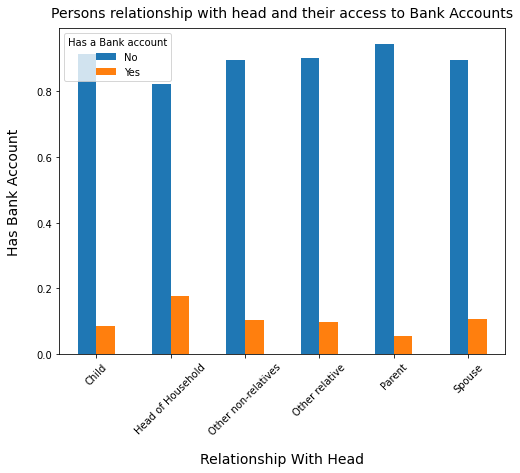

In [124]:
country = finance_ds1.groupby('The relathip with head')['Has a Bank account'].value_counts(normalize=True).unstack()
country.plot(kind='bar', figsize=(8, 6), stacked=False)
plt.xticks(rotation = 45)
plt.title('Persons relationship with head and their access to Bank Accounts', fontsize=14, y=1.015)
plt.ylabel('Has Bank Account', fontsize=14, labelpad=15)
plt.xlabel('Relationship With Head', fontsize=14, labelpad=15)
plt.show()

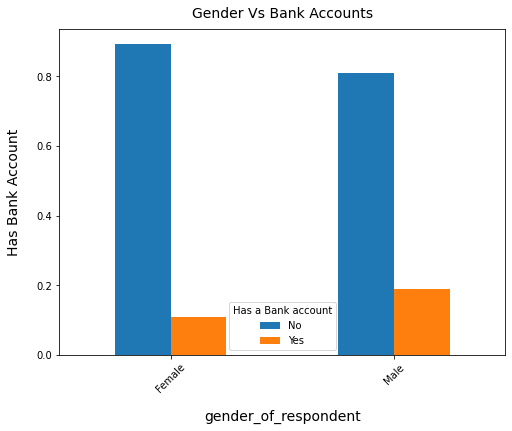

In [125]:
country = finance_ds1.groupby('gender_of_respondent')['Has a Bank account'].value_counts(normalize=True).unstack()
country.plot(kind='bar', figsize=(8, 6), stacked=False)
plt.xticks(rotation = 45)
plt.title('Gender Vs Bank Accounts', fontsize=14, y=1.015)
plt.ylabel('Has Bank Account', fontsize=14, labelpad=15)
plt.xlabel('gender_of_respondent', fontsize=14, labelpad=15)
plt.show()

# More males have bank accounts than females.

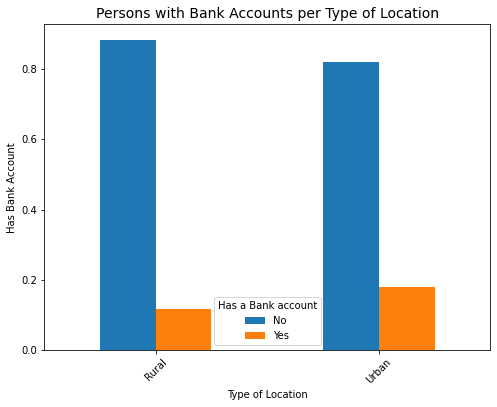

In [126]:
country = finance_ds1.groupby('Type of Location')['Has a Bank account'].value_counts(normalize=True).unstack()
country.plot(kind='bar', figsize=(8, 6))
plt.xticks(rotation = 45)
plt.title('Persons with Bank Accounts per Type of Location', fontsize=14)
plt.ylabel('Has Bank Account')
plt.xlabel('Type of Location')
plt.show()

# More people have bank accounts in rural areas.

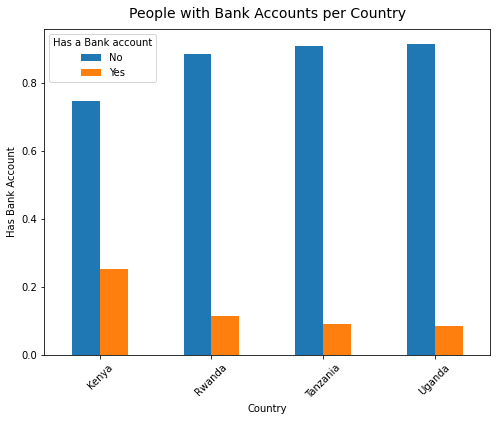

In [127]:
country = finance_ds1.groupby('country')['Has a Bank account'].value_counts(normalize=True).unstack()
country.plot(kind='bar', figsize=(8, 6), stacked=False)
plt.xticks(rotation = 45)
plt.title('People with Bank Accounts per Country', fontsize=14, y=1.015)
plt.ylabel('Has Bank Account')
plt.xlabel('Country')
plt.show()

# Kenya has the highest number of people with bank accounts.
# Uganda has the highest number of people without bank accounts.

Numerical data 

Text(0.5, 1.0, 'Respondent age vs household size')

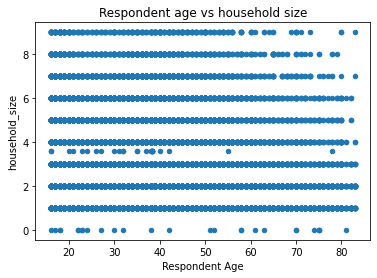

In [128]:
# A scatter plot of Respondent Age vs Household size.

finance_ds1.plot(x = 'Respondent Age', y ='household_size' , kind='scatter')
plt.title("Respondent age vs household size")

# There is no correlation between the ages of the respondents and the household size.

In [129]:
# Pearson's correlation coefficient

coeff = finance_ds1['Respondent Age'].corr(finance_ds1['household_size']) 

print(coeff)

# There is an inverse correlation between age of respondents and the household size
# Respondents age increases as the households size decreases and viceversa

-0.1061185735392243


In [130]:
#Correlation of the whole data set 

finance_ds1.corr()

# This shows the correlation between different categories.
# They are all negative correlations, they move in opposite directions and there is very little correlation.

,year,household_size,Respondent Age
year,1.000000,-0.097359,-0.023993
household_size,-0.097359,1.000000,-0.106119
Respondent Age,-0.023993,-0.106119,1.000000


**Multi-variate Analysis**

Text(0.5, 1.0, 'Individuals with bank accounts')

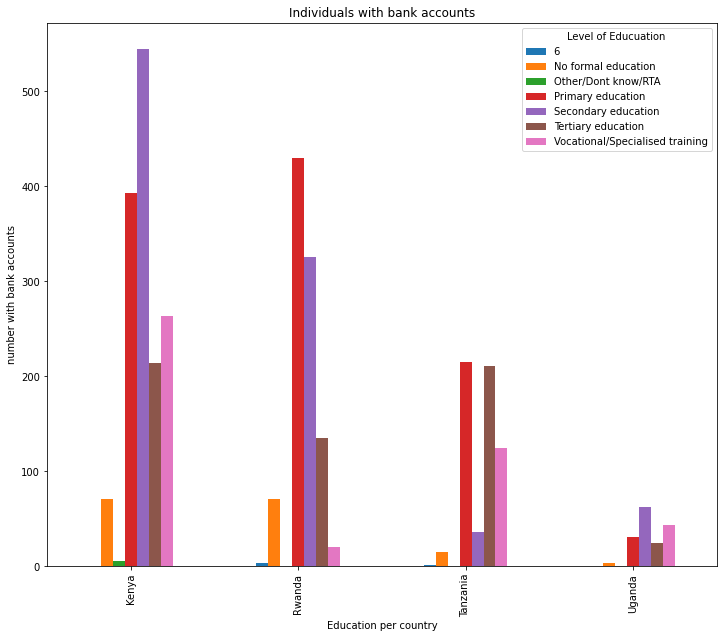

In [131]:
# Relationship between level of education, country and bank account status

country_education = pd.crosstab(index=[finance_ds1['Has a Bank account'],finance_ds1['country']], columns=finance_ds1['Level of Educuation'])
country_education.loc[('Yes', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1,2,3], labels=['Kenya','Rwanda','Tanzania','Uganda'])
plt.xlabel('Education per country')
plt.ylabel('number with bank accounts')
plt.title('Individuals with bank accounts')


# In Kenya, the highest number of people have a secondary education.
# In Rwanda this is people with a primary school education.
# In Tanzania, this is people with a primary education followed closely with Tertiary education.

Linear Discriminant Analysis

In [132]:
# creating and using dummies for this section.
finance_dummy = pd.get_dummies(finance_ds1[['country', 'Type of Location', 'Cell Phone Access', 'gender_of_respondent','The relathip with head', 'marital_status', 'Level of Educuation', 'Type of Job']])
finance_dummy.head(4)

,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,Type of Location_Rural,Type of Location_Urban,Cell Phone Access_No,Cell Phone Access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,...,Type of Job_Dont Know/Refuse to answer,Type of Job_Farming and Fishing,Type of Job_Formally employed Government,Type of Job_Formally employed Private,Type of Job_Government Dependent,Type of Job_Informally employed,Type of Job_No Income,Type of Job_Other Income,Type of Job_Remittance Dependent,Type of Job_Self employed
0,1,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [133]:
#for comparison purposes wth the initial dataset, we will concatnate the two datarames
new = pd.concat([finance_ds1, finance_dummy], axis = 1)
new.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,...,Type of Job_Dont Know/Refuse to answer,Type of Job_Farming and Fishing,Type of Job_Formally employed Government,Type of Job_Formally employed Private,Type of Job_Government Dependent,Type of Job_Informally employed,Type of Job_No Income,Type of Job_Other Income,Type of Job_Remittance Dependent,Type of Job_Self employed
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,...,0,0,0,0,0,0,0,0,0,1
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,...,0,0,0,0,1,0,0,0,0,0
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,...,0,0,0,0,0,0,0,0,0,1
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,...,0,0,0,1,0,0,0,0,0,0
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,...,0,0,0,0,0,1,0,0,0,0


In [134]:
# Divide the dataset into features (w) and corresponding labels (x)
# The i proceed to divide the resultant dataset into test and training sets

w = new.iloc[:, 12:].values
x = new.iloc[:, 2].values
print(w)
print(x)

[['Self employed' 1 0 ... 0 0 1]
 ['Government Dependent' 1 0 ... 0 0 0]
 ['Self employed' 1 0 ... 0 0 1]
 ...
 ['Other Income' 0 0 ... 1 0 0]
 ['Other Income' 0 0 ... 1 0 0]
 ['Self employed' 0 0 ... 0 0 1]]
['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_2114'
 'uniqueid_2115' 'uniqueid_2116']


In [135]:
# Divide the data into training and test sets
#
from sklearn.model_selection import train_test_split

w_train, w_test, x_train, x_test = train_test_split(w, x, test_size=0.2, random_state=0)

**Outcome Summary**

There are more individuals without a bank account(85%).

The Type of education one has an impact on one having a bank account. in all countries those with primary education, had no bank accounts.

**Challenging the Solution**

To get further relationshps between categorical data or perfom further analysis.